# Multi-Objective Flow Direction Algorithm (MOFDA) for Task Offloading

This notebook implements the MOFDA algorithm for the task offloading problem based on the paper "Leader selection based Multi-Objective Flow Direction Algorithm. (MOFDA): A novel approach for engineering design problems."

In [15]:
# !uv pip install pymoo

In [16]:
import sys

# Add the project root to the Python path
sys.path.append('../')

from pymoo.core.population import Population
# For newer pymoo versions use:
try:
    from pymoo.util.archive import Archive
except ImportError:
    # Fallback for older pymoo versions
    try:
        from pymoo.core.archive import Archive
    except ImportError:
        # Create a simple Archive class if not available
        class Archive(Population):
            def __init__(self, *args, **kwargs):
                super().__init__(*args, **kwargs)

from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from src.task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from src.task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from src.task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from src.task_offloading_moo.pymoo.algorithms.mofda_optimizer import MOFDAOptimizer
from task_offloading_moo.pymoo.termination.mofda_termination import MOFDATermination

## 1. Implementing MOFDA

First, we'll implement the Multi-Objective Flow Direction Algorithm based on the paper description.

## 2. Problem Setup

Now let's set up the task offloading problem similar to the PUMA notebook.

In [17]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

# Add this code above your algorithm definition

algorithm = MOFDAOptimizer(
    repair=TaskOffloadingRepair(),
    use_soft_repair=True,
    pop_size=pop_size,
    sampling=TaskOffloadingSampling(),
    n_max_iters=n_max_iters,
    archive_size=100,
    save_history=True,
    w=0.4,
    c1=2,
    c2=2,
    beta=4,
    delta=0.5
)

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

## 3. Run Optimization

In [18]:
res = minimize(problem,
               algorithm,
               termination=MOFDATermination(n_max_gen=n_max_iters),
               seed=1,
               verbose=True)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      600 |      1 |  1.0000000000 |         ideal
     3 |     1100 |      1 |  0.7545934948 |         ideal
     4 |     1600 |      1 |  0.000000E+00 |             f
     5 |     2100 |      1 |  0.000000E+00 |             f
     6 |     2600 |      1 |  0.5513770994 |         ideal
     7 |     3100 |      1 |  0.000000E+00 |             f
     8 |     3600 |      1 |  0.000000E+00 |             f
     9 |     4100 |      1 |  0.000000E+00 |             f
    10 |     4600 |      1 |  0.1434675053 |         ideal
    11 |     5100 |      1 |  0.000000E+00 |             f
    12 |     5600 |      1 |  0.000000E+00 |             f
    13 |     6100 |      1 |  0.000000E+00 |             f
    14 |     6600 |      1 |  0.000000E+00 |             f
    15 |     7100 |      1 |  0.0414563705 |         ideal
    16 |     7600 |      1 |  0.000000E+00 |            

## 4. Visualize Results

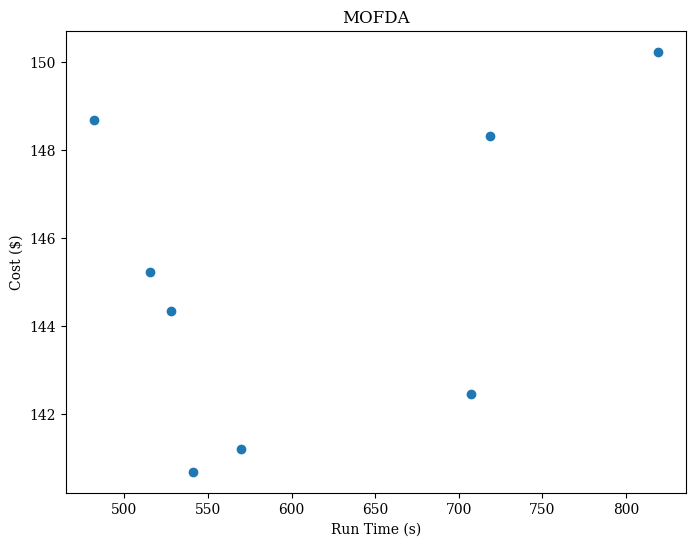

In [19]:
plot = Scatter(title="MOFDA")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

## 5. Create Animation of Optimization Progress

In [20]:
!pip install pyrecorder


[notice] A new release of pip available: 22.2.1 -> 25.0.1
[notice] To update, run: C:\Users\robin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [21]:
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video
import os

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
os.makedirs(out_path, exist_ok=True)
with Recorder(Video(os.path.join(out_path, "mofda_video.mp4"))) as rec:

    # for each algorithm object in the history
    for entry in res.history:
        sc = Scatter(title=("Gen %s" % entry.n_gen))
        sc.add(entry.opt.get("F"))
        sc.add(entry.problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
        sc.do()

        # record the current visualization to the video
        rec.record()